#### Edge Detection (Post-processing) for "Robot Artiste : Apprendre à dessiner à un robot par IA" 
Edge Detection is done by "Canny" edge detection with OpenCV. 

In [3]:
#Importing
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
import skimage.morphology as morp
import cv2 as cv

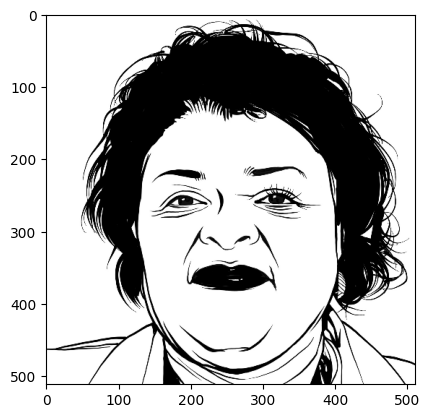

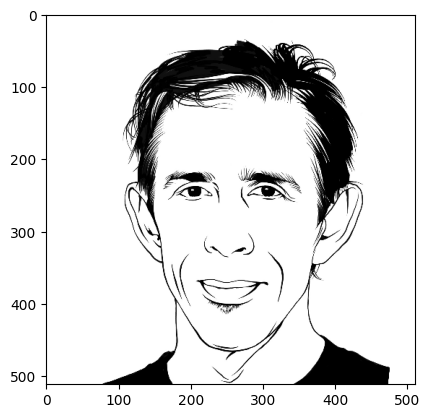

In [4]:
#Reading images
im1 = imread("1.png", as_gray=False)
im2 = imread("2.png", as_gray=False)

plt.imshow(im1,cmap="gray")
plt.show()

plt.imshow(im2,cmap="gray")
plt.show()

In [5]:
#Edge detection class
#Workflow : setting smoothing filters -> image smoothing -> Canny edge detection
class EdgeDetection :
    def __init__(self):
        self.filter = None
    
    #This method helps us create gaussian filters of different sizes
    def gauss_generator(self, shape = (3,3), sigma=0.5):
        m, n = [(ss - 1.) / 2. for ss in shape]
        y, x = np.ogrid[-m : m + 1 , -n : n + 1]
        h = np.exp( -(x * x + y * y) / (2. * sigma * sigma))
        h[ h < np.finfo(h.dtype).eps * h.max() ] = 0
        sumh = h.sum()
        if sumh != 0:
            h /= sumh
        return h

    #Setting smoothing filters 
    #Parameters : 
    # size -> size of matrix
    # type -> type of filter (can be mean or gaussian)
    def set_smoothing_filter(self, size = 3, type = "mean", gaussian_sigma = 0.5):
        if type == "mean":
            self.filter = np.ones((size, size))
        elif type == "gaussian":
            self.filter = self.gauss_generator(shape=(size,size), sigma = gaussian_sigma)
    #canny edge detection
    #Parameters : 
    # image -> input image
    # threshold1 & threshold2 -> canny edge detection parameters
    # is_grayscale -> Is input image is grayscale ?
    def canny_edge_detection(self, image, threshold1, threshold2, is_grayscale = False):
        #Transform image into gray-scale if necessary
        if is_grayscale:
            image_grayscale = image
        else:
            image_grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        #Smoothen image
        image_smoothened = convolve2d(image_grayscale, self.filter)
        image_smoothened = np.uint8(image_smoothened)
        
        #edge detection
        edges = cv.Canny(image_smoothened, threshold1, threshold2)

        return edges

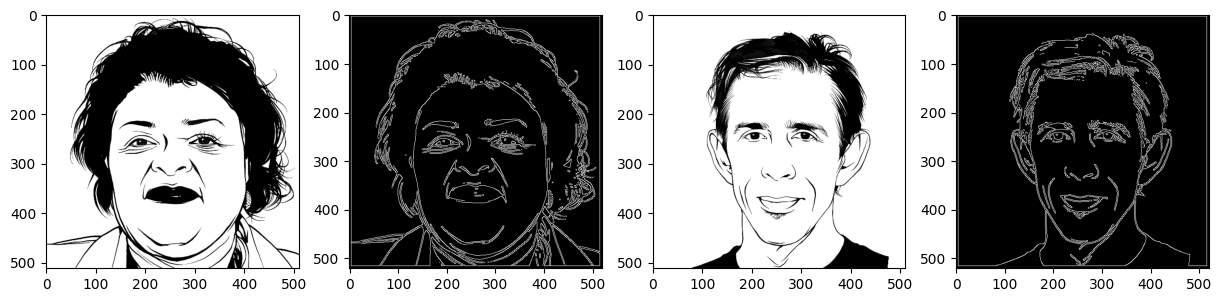

In [6]:
#Testing EdgeDetection class
ed = EdgeDetection()
#Setting smoothing filter
ed.set_smoothing_filter(size = 10, type = "gaussian", gaussian_sigma = 0.5)
#Applying canny edge detection
result1 = ed.canny_edge_detection(im1, 100, 50)
result2 = ed.canny_edge_detection(im2, 100, 50)

#Showing results
f, axis = plt.subplots(1,4, figsize=(15, 15)) 
axis[0].imshow(im1,cmap="gray")
axis[1].imshow(result1,cmap="gray")
axis[2].imshow(im2,cmap="gray")
axis[3].imshow(result2,cmap="gray")
plt.show()